# GARCH Stock Forecasting

In [5]:
!pip install pandas_datareader
!pip install arch
!pip install statsmodels

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 2.8 MB/s eta 0:00:00a 0:00:01


## Read Data

In [27]:
import pandas_datareader.data as web
from datetime import datetime, timedelta
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## SPY Volatility

In [52]:
start = datetime(2000, 1, 1)
end = datetime(2022, 11, 10)

In [53]:
spy = web.DataReader('SPY', 'yahoo', start=start, end=end)

In [54]:
returns = 100 * spy.Close.pct_change().dropna()

Text(0.5, 1.0, 'SPY Returns')

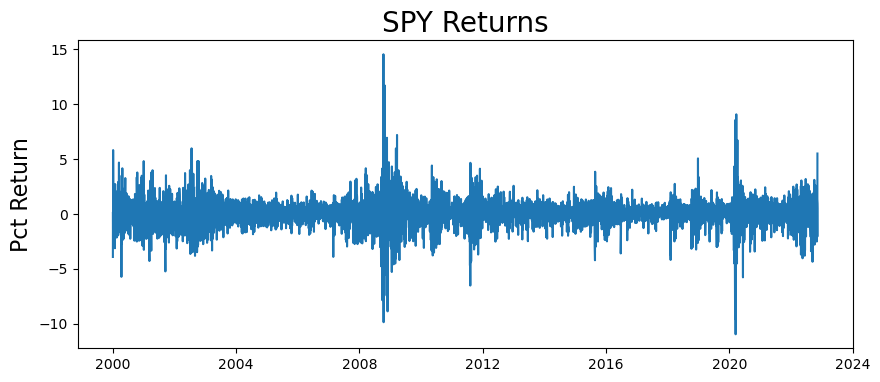

In [55]:
plt.figure(figsize=(10,4))
plt.plot(returns)
plt.ylabel('Pct Return', fontsize=16)
plt.title('SPY Returns', fontsize=20)

## PACF

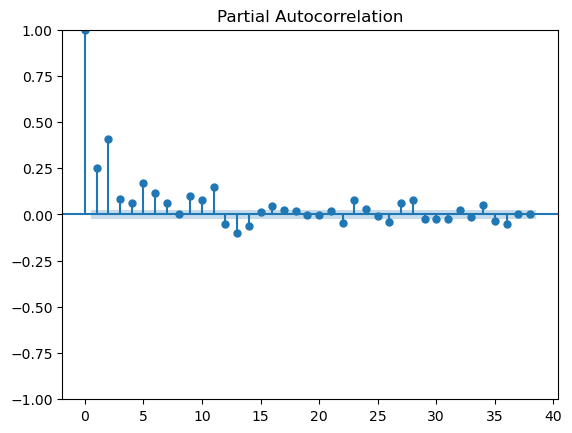

In [56]:
plot_pacf(returns**2)
plt.show()

## Fit GARCH(2,3)

In [57]:
model = arch_model(returns, p=2, q=3)

In [58]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      9,   Neg. LLF: 47303.72040190529
Iteration:      2,   Func. Count:     23,   Neg. LLF: 4860332715.177006
Iteration:      3,   Func. Count:     34,   Neg. LLF: 10692.106164949011
Iteration:      4,   Func. Count:     44,   Neg. LLF: 10629.631587691809
Iteration:      5,   Func. Count:     54,   Neg. LLF: 8118.293617055622
Iteration:      6,   Func. Count:     64,   Neg. LLF: 8003.9047380563825
Iteration:      7,   Func. Count:     73,   Neg. LLF: 7992.35644584808
Iteration:      8,   Func. Count:     81,   Neg. LLF: 7997.805163492112
Iteration:      9,   Func. Count:     91,   Neg. LLF: 8000.394024391433
Iteration:     10,   Func. Count:    100,   Neg. LLF: 7991.3782151787545
Iteration:     11,   Func. Count:    108,   Neg. LLF: 7991.219272881028
Iteration:     12,   Func. Count:    116,   Neg. LLF: 7991.215079254184
Iteration:     13,   Func. Count:    124,   Neg. LLF: 7991.209949409269
Iteration:     14,   Func. Count:    132,   Neg. LLF: 7991.20

In [59]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7991.21
Distribution:                  Normal   AIC:                           15996.4
Method:            Maximum Likelihood   BIC:                           16043.0
                                        No. Observations:                 5752
Date:                Tue, Nov 22 2022   Df Residuals:                     5751
Time:                        22:40:02   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0653  1.067e-02      6.119  9.439e-10 [4.436e-02,8.617e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0436  9.298e-03      4.688  2.761e-06 [2.536e-02,6.181e-02]
alpha[1]       0.0869  2.114e-02      4.111  3.944e-05   [4.547e-02,  0.128]
alpha[2]       0.1384  2.250e-02      6.149  7.808e-10   [9.426e-02,  0.182]
beta[1]        0.1991      0.209      0.951      0.342     [ -0.211,  0.610]
beta[2]        0.5466      0.233      2.350  1.878e-02   [9.069e-02,  1.002]
beta[3]    2.3111e-33      0.129  1.798e-32      1.000     [ -0.252,  0.252]
============================================================================

Covariance estimator: robust
"""

## Try GARCH(3,0) = ARCH(3)

In [60]:
model = arch_model(returns, p=3, q=0)

In [61]:
model_fit = model.fit()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 38149.67068668545
Iteration:      2,   Func. Count:     17,   Neg. LLF: 13937.169052235524
Iteration:      3,   Func. Count:     26,   Neg. LLF: 61067.40288828219
Iteration:      4,   Func. Count:     33,   Neg. LLF: 3665550.026780959
Iteration:      5,   Func. Count:     40,   Neg. LLF: 23448.85182444625
Iteration:      6,   Func. Count:     47,   Neg. LLF: 14152.602682171831
Iteration:      7,   Func. Count:     54,   Neg. LLF: 26420.85123131448
Iteration:      8,   Func. Count:     61,   Neg. LLF: 8459.692460464368
Iteration:      9,   Func. Count:     68,   Neg. LLF: 8319.867730823036
Iteration:     10,   Func. Count:     74,   Neg. LLF: 8316.78717053636
Iteration:     11,   Func. Count:     80,   Neg. LLF: 8316.787222690147
Iteration:     12,   Func. Count:     87,   Neg. LLF: 8315.370845106894
Iteration:     13,   Func. Count:     93,   Neg. LLF: 8315.342982043716
Iteration:     14,   Func. Count:     99,   Neg. LLF: 8315.3403

In [62]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8315.34
Distribution:                  Normal   AIC:                           16640.7
Method:            Maximum Likelihood   BIC:                           16674.0
                                        No. Observations:                 5752
Date:                Tue, Nov 22 2022   Df Residuals:                     5751
Time:                        22:40:07   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0686  1.211e-02      5.665  1.471e-08 [4.487e-02,9.233e-02]
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.4069  2.750e-02     14.799  1.479e-49 [  0.353,  0.461]
alpha[1]       0.1875  2.763e-02      6.784  1.168e-11 [  0.133,  0.242]
alpha[2]       0.3662  3.904e-02      9.379  6.678e-21 [  0.290,  0.443]
alpha[3]       0.2478  2.676e-02      9.259  2.067e-20 [  0.195,  0.300]
========================================================================

Covariance estimator: robust
"""

## Try GARCH(2,1) 

In [63]:
model = arch_model(returns, p=2, q=1)
model_fit = model.fit()
model_fit.summary()

Iteration:      1,   Func. Count:      7,   Neg. LLF: 81427.51039501136
Iteration:      2,   Func. Count:     19,   Neg. LLF: 35337.57474866966
Iteration:      3,   Func. Count:     30,   Neg. LLF: 1296532249.5333295
Iteration:      4,   Func. Count:     37,   Neg. LLF: 13203.089770635072
Iteration:      5,   Func. Count:     45,   Neg. LLF: 8244.67392272133
Iteration:      6,   Func. Count:     52,   Neg. LLF: 8010.115653528376
Iteration:      7,   Func. Count:     59,   Neg. LLF: 8032.3746083954
Iteration:      8,   Func. Count:     66,   Neg. LLF: 8027.734794575892
Iteration:      9,   Func. Count:     73,   Neg. LLF: 7994.192259841546
Iteration:     10,   Func. Count:     80,   Neg. LLF: 7994.134450891374
Iteration:     11,   Func. Count:     87,   Neg. LLF: 7994.118756978527
Iteration:     12,   Func. Count:     92,   Neg. LLF: 7994.118756980999
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7994.118756978527
            Iterations: 12
  

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7994.12
Distribution:                  Normal   AIC:                           15998.2
Method:            Maximum Likelihood   BIC:                           16031.5
                                        No. Observations:                 5752
Date:                Tue, Nov 22 2022   Df Residuals:                     5751
Time:                        22:40:14   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0645  1.066e-02      6.044  1.507e-09 [4.355e-02,8.535e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0293  6.614e-03      4.436  9.150e-06 [1.638e-02,4.230e-02]
alpha[1]       0.0845  2.103e-02      4.020  5.822e-05   [4.332e-02,  0.126]
alpha[2]       0.0636  2.638e-02      2.410  1.597e-02   [1.186e-02,  0.115]
beta[1]        0.8325  1.862e-02     44.709      0.000     [  0.796,  0.869]
============================================================================

Covariance estimator: robust
"""

In [64]:
rolling_predictions = []
test_size = 365

for i in range(test_size):
    train = returns[:-(test_size-i)]
    model = arch_model(train, p=2, q=1)
    model_fit = model.fit(disp='off')
    pred = model_fit.forecast(horizon=1)
    rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [65]:
rolling_predictions = pd.Series(rolling_predictions, index=returns.index[-365:])

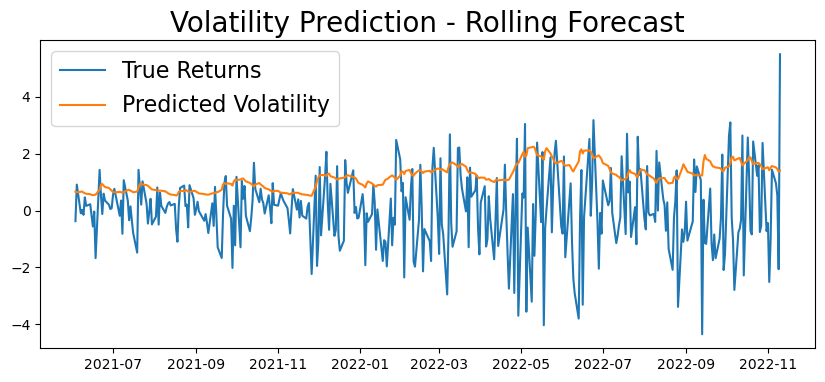

In [66]:
plt.figure(figsize=(10,4))
true, = plt.plot(returns[-365:])
preds, = plt.plot(rolling_predictions)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted Volatility'], fontsize=16)

In [67]:
train = returns
model = arch_model(train, p=2, q=1)
model_fit = model.fit(disp='off')

In [68]:
pred = model_fit.forecast(horizon=7)
future_dates = [returns.index[-1] + timedelta(days=i) for i in range(1,8)]
pred = pd.Series(np.sqrt(pred.variance.values[-1,:]), index=future_dates)

In [70]:
start = datetime(2022, 11, 10)
end = datetime(2022, 11, 17)
spy_ = web.DataReader('SPY', 'yahoo', start=start, end=end)
returns_ = 100 * spy_.Close.pct_change().dropna()

Text(0.5, 1.0, 'Volatility Prediction - Rolling Forecast')

<Figure size 1000x400 with 0 Axes>

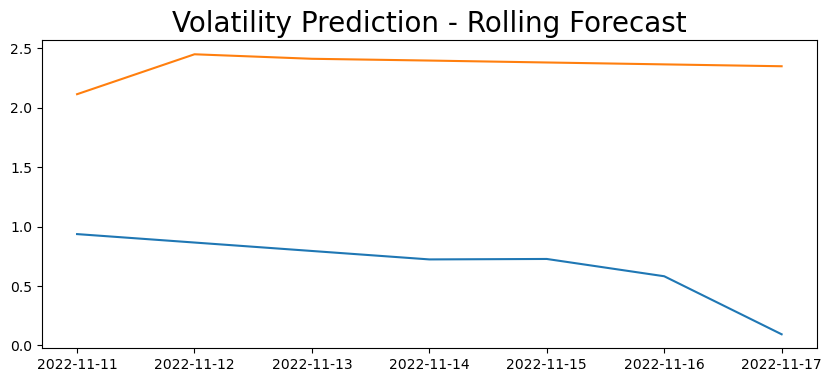

In [72]:
plt.figure(figsize=(10,4))
plt.figure(figsize=(10,4))
true, = plt.plot(returns_**2)
plt.plot(pred)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)